<a href="https://colab.research.google.com/github/Nasrin-Akhtar/IITM_MLT-Machine_Learning_Technique/blob/main/Week6_Ridge_and_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Week-6

**Note:**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.



## Dataset

Run the cell given below to generate the data-matrix $X$ and target vector $y$. $X$ is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. $y$ is of shape $(n,)$. You will be using this dataset for the rest of the assignment.

**Do not edit this cell.**

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)

# set the random seed value to 0
np.random.seed(0)

## Problem 1
How many samples are there in the dataset?



## Solution

In [3]:
X.shape[0]# Write your solution code here

442

## Problem 2

How many features are there in the dataset?



## Solution

In [4]:
X.shape[1]# Write your solution code here

10

## Problem 3
Write a function `shuffle_data(X, y)` that returns the shuffled $X$ and $y$.

Note that it should shuffle the data pairs $(x_i, y_i)$.

What will be the mean of the first 5 values in $y$?



In [5]:
def shuffle_data(X,y):
  #sample=X.shape[0]
  #shuffle= np.random.permutation(sample)
  #X_shuffle=X[shuffle]
  #Y_shuffle=y[shuffle]
  #mean = np.mean(Y_shuffle[:5])
  #return mean,X_shuffle, Y_shuffle
  data= list(zip(X,y))
  np.random.shuffle(data)
  X_shuffle, y_shuffle= zip(*data)
  return np.array(X_shuffle), np.array(y_shuffle)
X_shuffle, y_shuffle = shuffle_data(X,y)
mean= np.mean(y_shuffle[:5])
print(mean)
# Write your solution code here

180.4


## Problem 4

Write a function `train_test_split(X, y, test_size)` that divides the data (X, y) into $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively as per test_size which should be a value between 0 and 1.

That is, if test_size = $t$, then `int(t*n)` data points should go to test and the remaining data points should go to train.

$X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ should be returned by the function.

Set the test_size to be 0.25 and output the sum of all y values settling in $y_{test}$.








In [7]:
def train_test_split(X,y, test_size):
  sample=int(test_size*len(y))
  #indices=np.random.permutation(len(y))
  #test_indices=indices[:sample]
  #train_indices= indices[sample:]
  X_train, y_train= X[sample:], y[sample:]
  X_test, y_test= X[:sample], y[:sample]
  res= sum(y_test)
  print('sum of y_test is', res)
  return X_train, X_test, y_train, y_test
train_test_split(X_shuffle,y_shuffle,0.25)
  # Write your solution code here

sum of y_test is 16779.0


(array([[ 0.04170844,  0.05068012,  0.01966154, ..., -0.00259226,
          0.0311926 ,  0.00720652],
        [-0.04910502, -0.04464164, -0.05686312, ..., -0.03949338,
         -0.01189685,  0.01549073],
        [-0.05273755, -0.04464164, -0.05578531, ...,  0.03430886,
          0.13237579,  0.00306441],
        ...,
        [ 0.05987114, -0.04464164, -0.02129532, ...,  0.07120998,
          0.07912244,  0.13561183],
        [-0.07816532, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.01811369, -0.08391984],
        [ 0.04170844,  0.05068012,  0.07139652, ...,  0.03430886,
          0.07340696,  0.08590655]]),
 array([[ 0.01991321,  0.05068012,  0.10480869, ..., -0.00259226,
          0.00370906,  0.04034337],
        [-0.01277963, -0.04464164,  0.06061839, ...,  0.03430886,
          0.07020738,  0.00720652],
        [ 0.03807591,  0.05068012,  0.00888341, ..., -0.00259226,
         -0.01811369,  0.00720652],
        ...,
        [-0.04547248,  0.05068012,  0.13714305, ...,  

## Problem 5

What are the shapes of $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively?



In [8]:
out_var=train_test_split(X_shuffle,y_shuffle,0.25)

X_train, X_test, y_train, y_test= out_var
print('shape of X_train',X_train.shape)
print('shape of y_train',y_train.shape)
print('shape of X_test',X_test.shape)
print('shape of y_test',y_test.shape)# Write your solution code here

sum of y_test is 16779.0
shape of X_train (332, 10)
shape of y_train (332,)
shape of X_test (110, 10)
shape of y_test (110,)


## Problem 6
Add a dummy feature, i.e., a column containing all 1's (as the first column) in $X_{train}$ and $X_{test}$.

Take the transpose of both $X_{train}$ and $X_{test}$.

What are the shapes of $X_{train}$ and $X_{test}$?



In [9]:
X_train_new=np.column_stack((np.ones((X_train.shape[0])),X_train))
X_test_new=np.column_stack((np.ones((X_test.shape[0])),X_test))
X_train1=X_train_new.T
X_test1= X_test_new.T
print(X_train1.shape)
print(X_test1.shape)
# Write your solution code here

(11, 332)
(11, 110)


## Problem 7

Write a function `compute_weights(X, y)` that uses the closed form formula of linear regression and returns a weight vector.

Call this function by passing $X_{train}$ and $y_{train}$. As the dummy feature was added as the first column, the first value in the weight vector will be the intercept. What is its value (rounded to one decimal place)?



In [10]:
def compute_weights(X,y):
  prod=np.dot(X.T,X)
  inv=np.dot(np.linalg.pinv(prod),X.T)
  weight=np.dot(inv,y)
  print(weight[0])
  weight=np.linalg.inv(X.T @ X) @ X.T @ y
  return weight
compute_weights(X_train_new,y_train)
  # Write your solution code here

153.01360145107083


array([ 153.01360145,  -43.83240026, -209.56222163,  593.6442307 ,
        301.83639293, -558.45714382,  258.53785369,   -7.07169429,
        139.87458192,  701.10058997,   28.9847114 ])

## Problem 8

Write a function `MSE(X, y, w)` that returns the mean squared error for the given `X`, `y` as per `w` values.

Using this function, compute the train error and test error.

Note: Here `y` is the true `y` for `X`.

Compute both train and test error.

What is the value of test error?


In [11]:
def MSE(X,y,w):
  y_pred= X @ w
  mse=np.mean((y-y_pred)**2)
  return mse
weights=compute_weights(X_train_new,y_train)

MSE(X_test_new,y_test,weights)# Write your solution code here

153.01360145107083


3205.7177135064812

## Problem 9

Write a function `compute_weights_ridge(X, y)` that uses the closed form formula of Ridge regression and returns a weight vector.

Call this function by passing  `X_train`, `y_train` and 0.3 as the value of regularization strength.


Find the sum of values in the weight vector obtained. How much reduction in total sum of weights is achieved with respect to the the weight vector obtained from 'plain' linear regression (without regularization) computed earlier.


In [12]:
def compute_weights_ridge(X, y, alpha):
  identity_matrix = np.identity(X.shape[1])
  weights1 = np.linalg.inv(X.T @ X + alpha * identity_matrix) @ X.T @ y
  return weights1
ridge_w= compute_weights_ridge(X_train_new, y_train, 0.3)
ridge_sum=np.sum(ridge_w)
print(ridge_sum)
linear_w= compute_weights(X_train_new, y_train)
linear_sum= np.sum(linear_w)
redundancy= linear_sum - ridge_sum
print('redundancy:', redundancy)
  # Write your solution code here

984.7352995995072
153.01360145107083
redundancy: 373.33320246076255


## Problem 10

Compute the train error and test error. What is their absolute difference?



In [13]:
train_error= MSE(X_train_new, y_train,ridge_w)
test_error = MSE(X_test_new, y_test,ridge_w)
diff= abs(train_error-test_error)
print(diff)# Write your solution code here

189.15638044975412


## Problem 11

Use 10 different values between 0 and 5 as the regularization strength and keep a record of the weight vectors obtained for each. Further, calculate the sum of weights for each weight vector.

Plot these sums of weights (on y-axis) with respect to the regularization strength (on x-axis) and observe the reduction in (sum of) weights.



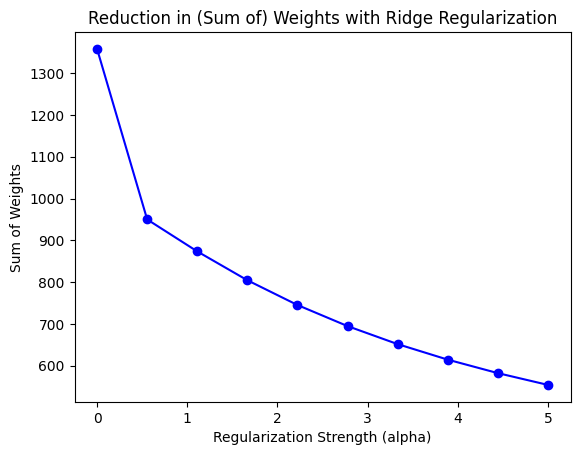

In [14]:
alphas = np.linspace(0, 5, 10)
sums_of_weights = []
weight_vectors = []
# Compute weights and record sums for each regularization strength
for i in alphas:
    weights = compute_weights_ridge(X_train_new, y_train, i)
    weight_vectors.append(weights)
    sums_of_weights.append(np.sum(weights))

# Plotting
plt.plot(alphas, sums_of_weights, marker='o', linestyle='-', color='b')
plt.title('Reduction in (Sum of) Weights with Ridge Regularization')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Sum of Weights')
plt.show()# Write your solution code here